In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

jobs_barbie = pd.read_csv('DATA/barbie_careers.csv')
jobs_real = pd.read_csv('DATA/employment_earnings.csv')

In [87]:
import seaborn as sns

# Define your custom pink color palette
custom_palette = [ '#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FFA07A', '#FF7F50', '#FF6347', '#FF4500', "#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585","#FEC5E5"]

# Set the custom palette as the default for Seaborn plots
sns.set_palette(custom_palette)
sns.set_style('whitegrid',  rc={'axes.labelcolor': "#C71585",    
        'xtick.color': "#DB7093",        
        'ytick.color': "#DB7093",
        'grid.color':'#FFC0CB',
        'axes.edgecolor':'#FFC0CB'
        })

<span style="color: #E0218A; font-size: 36px;">During this exploratory data analysis we are going to find out how women careers are represented both in Barbie world and in real life.</span>

In [100]:
jobs_barbie.head(60)

,ID,Type,Career,Year
0,1,Education,Aerobics instructor,1984.0
1,2,Education,Aerobics instructor,2009.0
2,3,Education,Art teacher,2002.0
3,4,Education,Dance teacher,2007.0
4,5,Education,Elementary teacher,1985.0
5,6,Education,Elementary teacher,1992.0
6,7,Education,Elementary teacher,1995.0
7,8,Education,Elementary teacher,1996.0
8,9,Education,Elementary teacher,2006.0
9,10,Education,Elementary teacher,2010.0


In [101]:
jobs_barbie.tail(60)

,ID,Type,Career,Year
170,171,Arts,Singer,1986.0
171,172,Arts,Singer,2009.0
172,173,Business,Wedding stylist,2009.0
173,174,Arts,Musician,2017.0
174,175,Beauty,Hair stylist,2012.0
175,176,Business,Chef,1996.0
176,177,Business,Chef,2008.0
177,178,Business,Business executive,1960.0
178,179,Business,Business executive,1963.0
179,180,Business,Business executive,1978.0


In [104]:
#from the output below we can clearly see that not all barbies careers listed in business type are, in fact, in business field
business_barbie = jobs_barbie[jobs_barbie['Type'] == 'Business']
business_barbie

,ID,Type,Career,Year
172,173,Business,Wedding stylist,2009.0
175,176,Business,Chef,1996.0
176,177,Business,Chef,2008.0
177,178,Business,Business executive,1960.0
178,179,Business,Business executive,1963.0
179,180,Business,Business executive,1978.0
180,181,Business,Business executive,1985.0
181,182,Business,Business executive,1992.0
182,183,Business,Business executive,1999.0
183,184,Business,Owner of Willow's Cafe,2011.0


In [163]:
#create a new type 'Retail_customer' to include jobs with customer interaction abd selling to customers

retail_customer = ["retail_customer","Resort greeter","McDonald's cashier", "Soda founta waitress (Coca Cola edition)","Waitress"]
restaurant_kitchen = ["restaurant_kitchen","Noodle bar worker","Coffee shop worker", "Chef"]
farming = ['farming', 'Bee Keeper', 'Chicken farmer']
new_categories = [retail_customer,restaurant_kitchen,farming]

In [60]:
jobs_barbie.describe()

,ID,Year
count,230.000000,226.000000
mean,115.500000,1997.349558
std,66.539462,18.113149
min,1.000000,1959.000000
25%,58.250000,1985.250000
50%,115.500000,2000.500000
75%,172.750000,2012.000000
max,230.000000,2020.000000


In [61]:
jobs_barbie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      230 non-null    int64  
 1   Type    230 non-null    object 
 2   Career  230 non-null    object 
 3   Year    226 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.3+ KB


In [62]:
missing_years = jobs_barbie[jobs_barbie['Year'].isna()]
missing_years

,ID,Type,Career,Year
14,15,Education,Special education teacher,NaN
63,64,Science and engineering,Geologist,NaN
163,164,Arts,Photographer,NaN
190,191,Business,Banker,NaN


In [63]:
#Since only 4 years are missing we can look them up and add manually
#create dictionary of misssing barbies and years
career_year = {'Special education teacher' :2020, 'Geologist': 2021, 'Photographer': 2014, 'Banker': 2019} 

for key, value in career_year.items():
    jobs_barbie.loc[jobs_barbie['Career'] == key, 'Year'] = value

In [64]:
jobs_barbie.groupby('Type')['Type'].count()

Type
Arts                       22
Beauty                     67
Business                   25
Education                  23
Medicine                   11
Military                    8
Political                   9
Public Service              7
Science and engineering    12
Sport                      31
Transportation             15
Name: Type, dtype: int64

<span style="color: #E0218A; font-size: 30px;"> We can see from the graph below that majority professions represented in Barbies are from Beauty industry.</span>

In [154]:
jobs_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          338 non-null    object 
 1   Number of full-time workers                         338 non-null    object 
 2   Number of men                                       338 non-null    object 
 3   Number of women                                     338 non-null    object 
 4   Percentage of women in occupational group           338 non-null    float64
 5   Median earnings                                     338 non-null    object 
 6   Median earnings men                                 338 non-null    object 
 7   Median earnings women                               338 non-null    object 
 8   Women's earnings as a percentage of men's earnings  336 non-null    float64
dtype

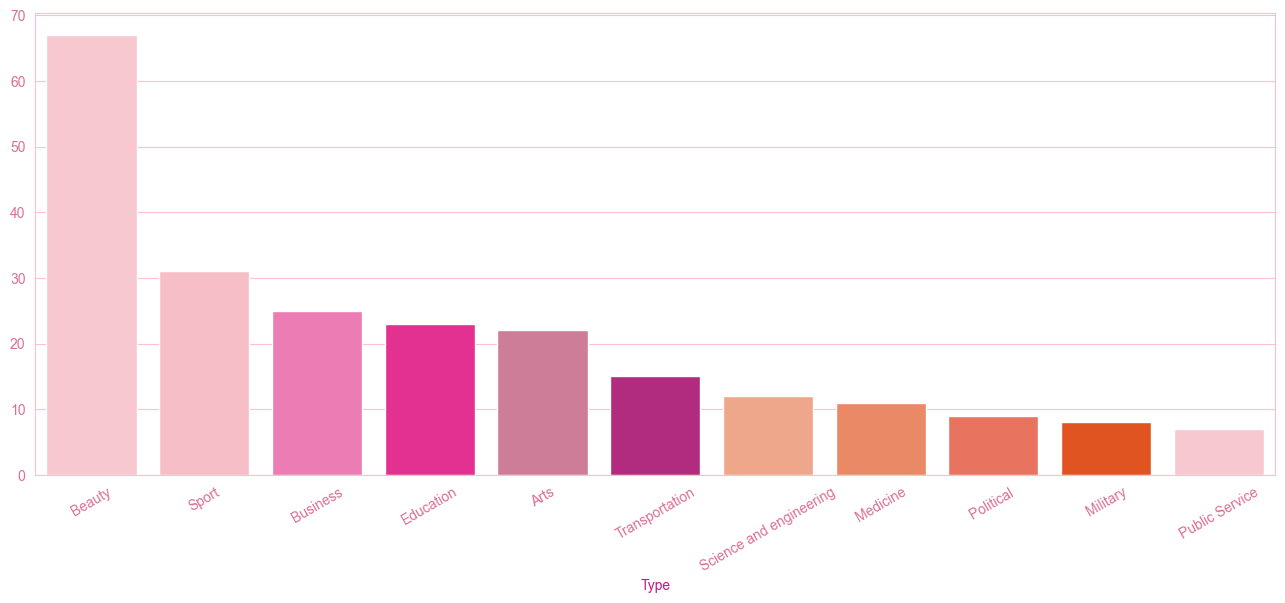

In [93]:

career_types = jobs_barbie.groupby('Type')['Type'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(rotation = 30)
sns.barplot(x = career_types.index, y = career_types.values, palette=custom_palette);

<span style="color: #E0218A; font-size: 30px;">Now we are going to find out in what fields have the highest representations of  women in real life</span>

In [68]:
jobs_real.head()

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings
0,Accountants and auditors,"1,452,102","614,573","837,529",57.7,"75,713","84,537","69,691",82.4
1,Actuaries,"33,962","25,529","8,433",24.8,"129,791","135,774","124,509",91.7
2,Administrative services managers,"59,654","14,792","44,862",75.2,"70,082","85,238","65,351",76.7
3,Advertising and promotions managers,"57,735","27,035","30,700",53.2,"86,690","97,919","77,910",79.6
4,Advertising sales agents,"86,861","45,286","41,575",47.9,"67,398","68,208","66,313",97.2


In [71]:
jobs_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          338 non-null    object 
 1   Number of full-time workers                         338 non-null    object 
 2   Number of men                                       338 non-null    object 
 3   Number of women                                     338 non-null    object 
 4   Percentage of women in occupational group           338 non-null    float64
 5   Median earnings                                     338 non-null    object 
 6   Median earnings men                                 338 non-null    object 
 7   Median earnings women                               338 non-null    object 
 8   Women's earnings as a percentage of men's earnings  336 non-null    float64
dtype

In [70]:
top20_fields = jobs_real.nlargest(20, 'Percentage of women in occupational group')

In [72]:
top20_fields

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings
261,Preschool and kindergarten teachers,"476,797","11,561","465,236",97.6,"34,569","36,834","34,426",93.5
103,Executive secretaries and executive administra...,"233,339","13,167","220,172",94.4,"63,646","59,589","63,982",107.4
41,Childcare workers,"380,451","22,323","358,128",94.1,"25,365","26,729","25,241",94.4
295,"Secretaries and administrative assistants, exc...","1,541,391","110,655","1,430,736",92.8,"41,767","49,636","41,478",83.6
78,Dental assistants,"166,272","12,158","154,114",92.7,"35,349","40,485","35,092",86.7
188,Medical assistants,"434,436","37,180","397,256",91.4,"35,170","40,400","34,721",85.9
189,Medical records specialists,"167,694","16,243","151,451",90.3,"45,177","47,499","44,958",94.7
280,Receptionists and information clerks,"723,332","75,075","648,257",89.6,"32,397","39,724","32,109",80.8
137,"Hairdressers, hairstylists, and cosmetologists","286,507","30,220","256,287",89.5,"31,311","37,587","30,978",82.4
23,Billing and posting clerks,"361,880","42,995","318,885",88.1,"40,054","45,938","39,504",86.0


<span style="color: #E0218A; font-size: 30px;">As we see in the graph below fields, where majority of workers are women,related to childcare, various kinds of assistance,clerks and home aides</span>

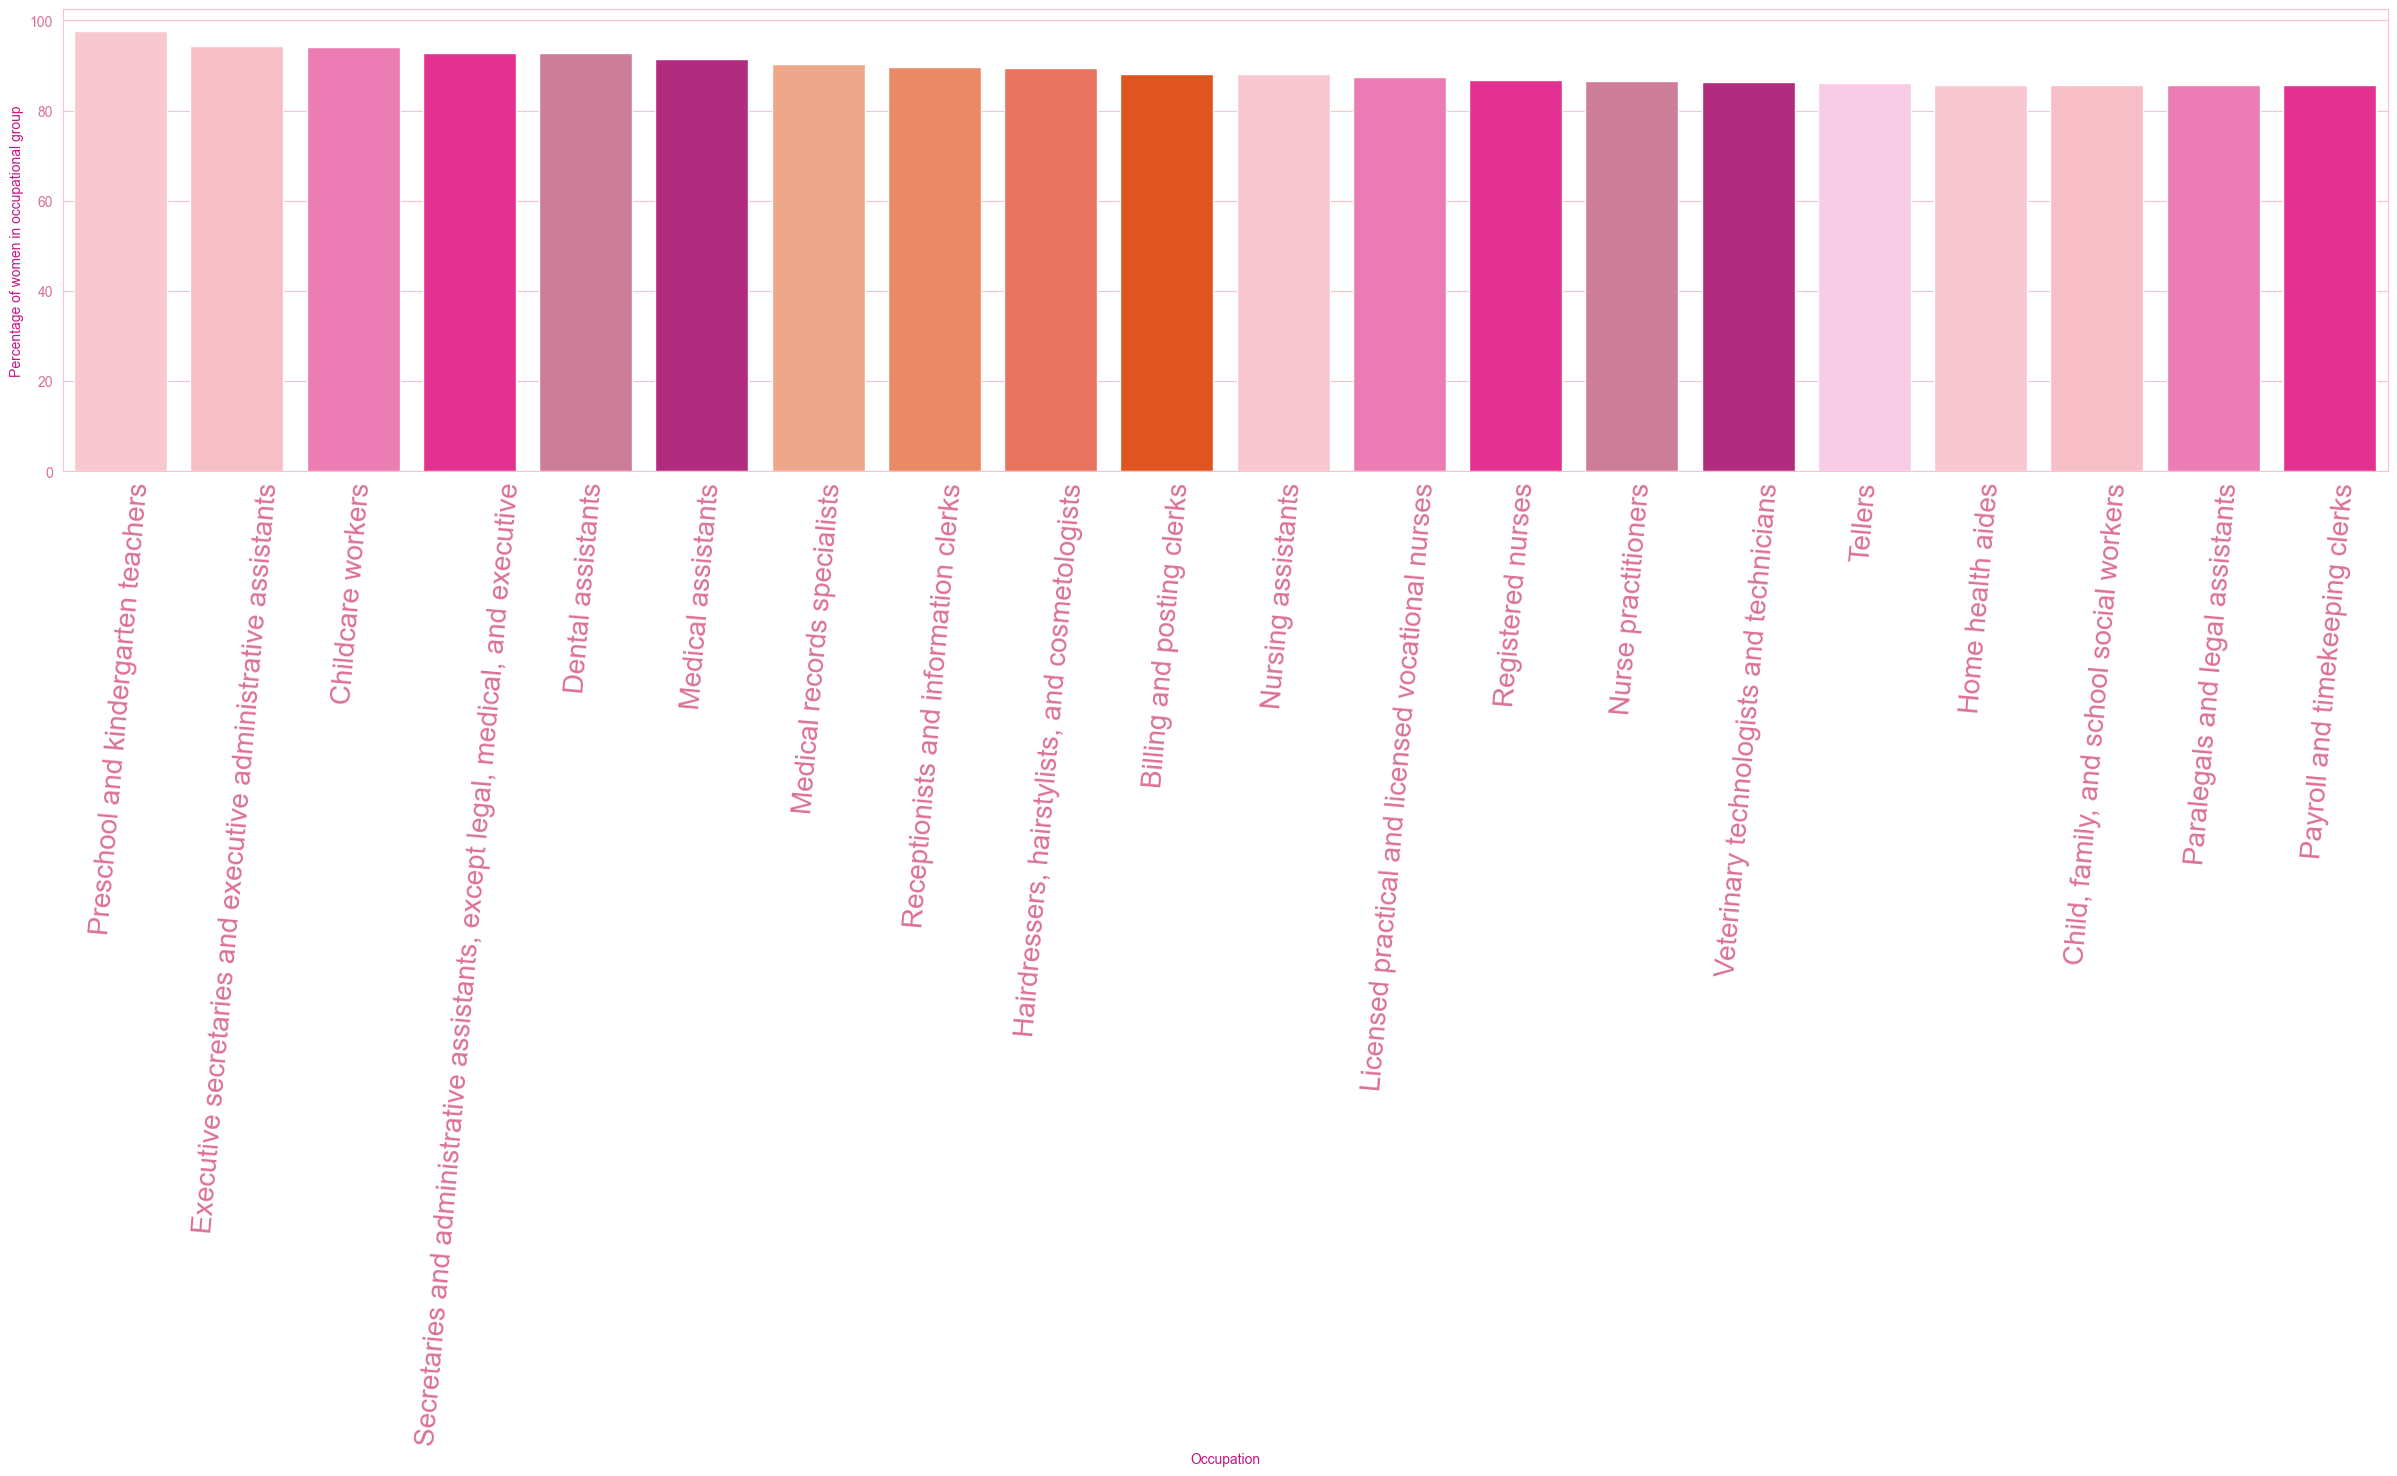

In [90]:
fig, ax = plt.subplots(figsize=(30, 6))
# Rotate the x-axis labels by 60 degrees
ax.tick_params(axis='x', rotation=85)

# Set a proper font size for the x-axis labels
ax.tick_params(axis='x', labelsize=20)

#plt.xticks(rotation=80)

sns.barplot(data = top20_fields, x = 'Occupation', y = 'Percentage of women in occupational group',palette=custom_palette);

<span style="color: #E0218A; font-size: 30px;">Now let's take a look at the fields, where women are the least represented.</span>

In [91]:
small_represent = jobs_real.nsmallest(20, 'Percentage of women in occupational group')

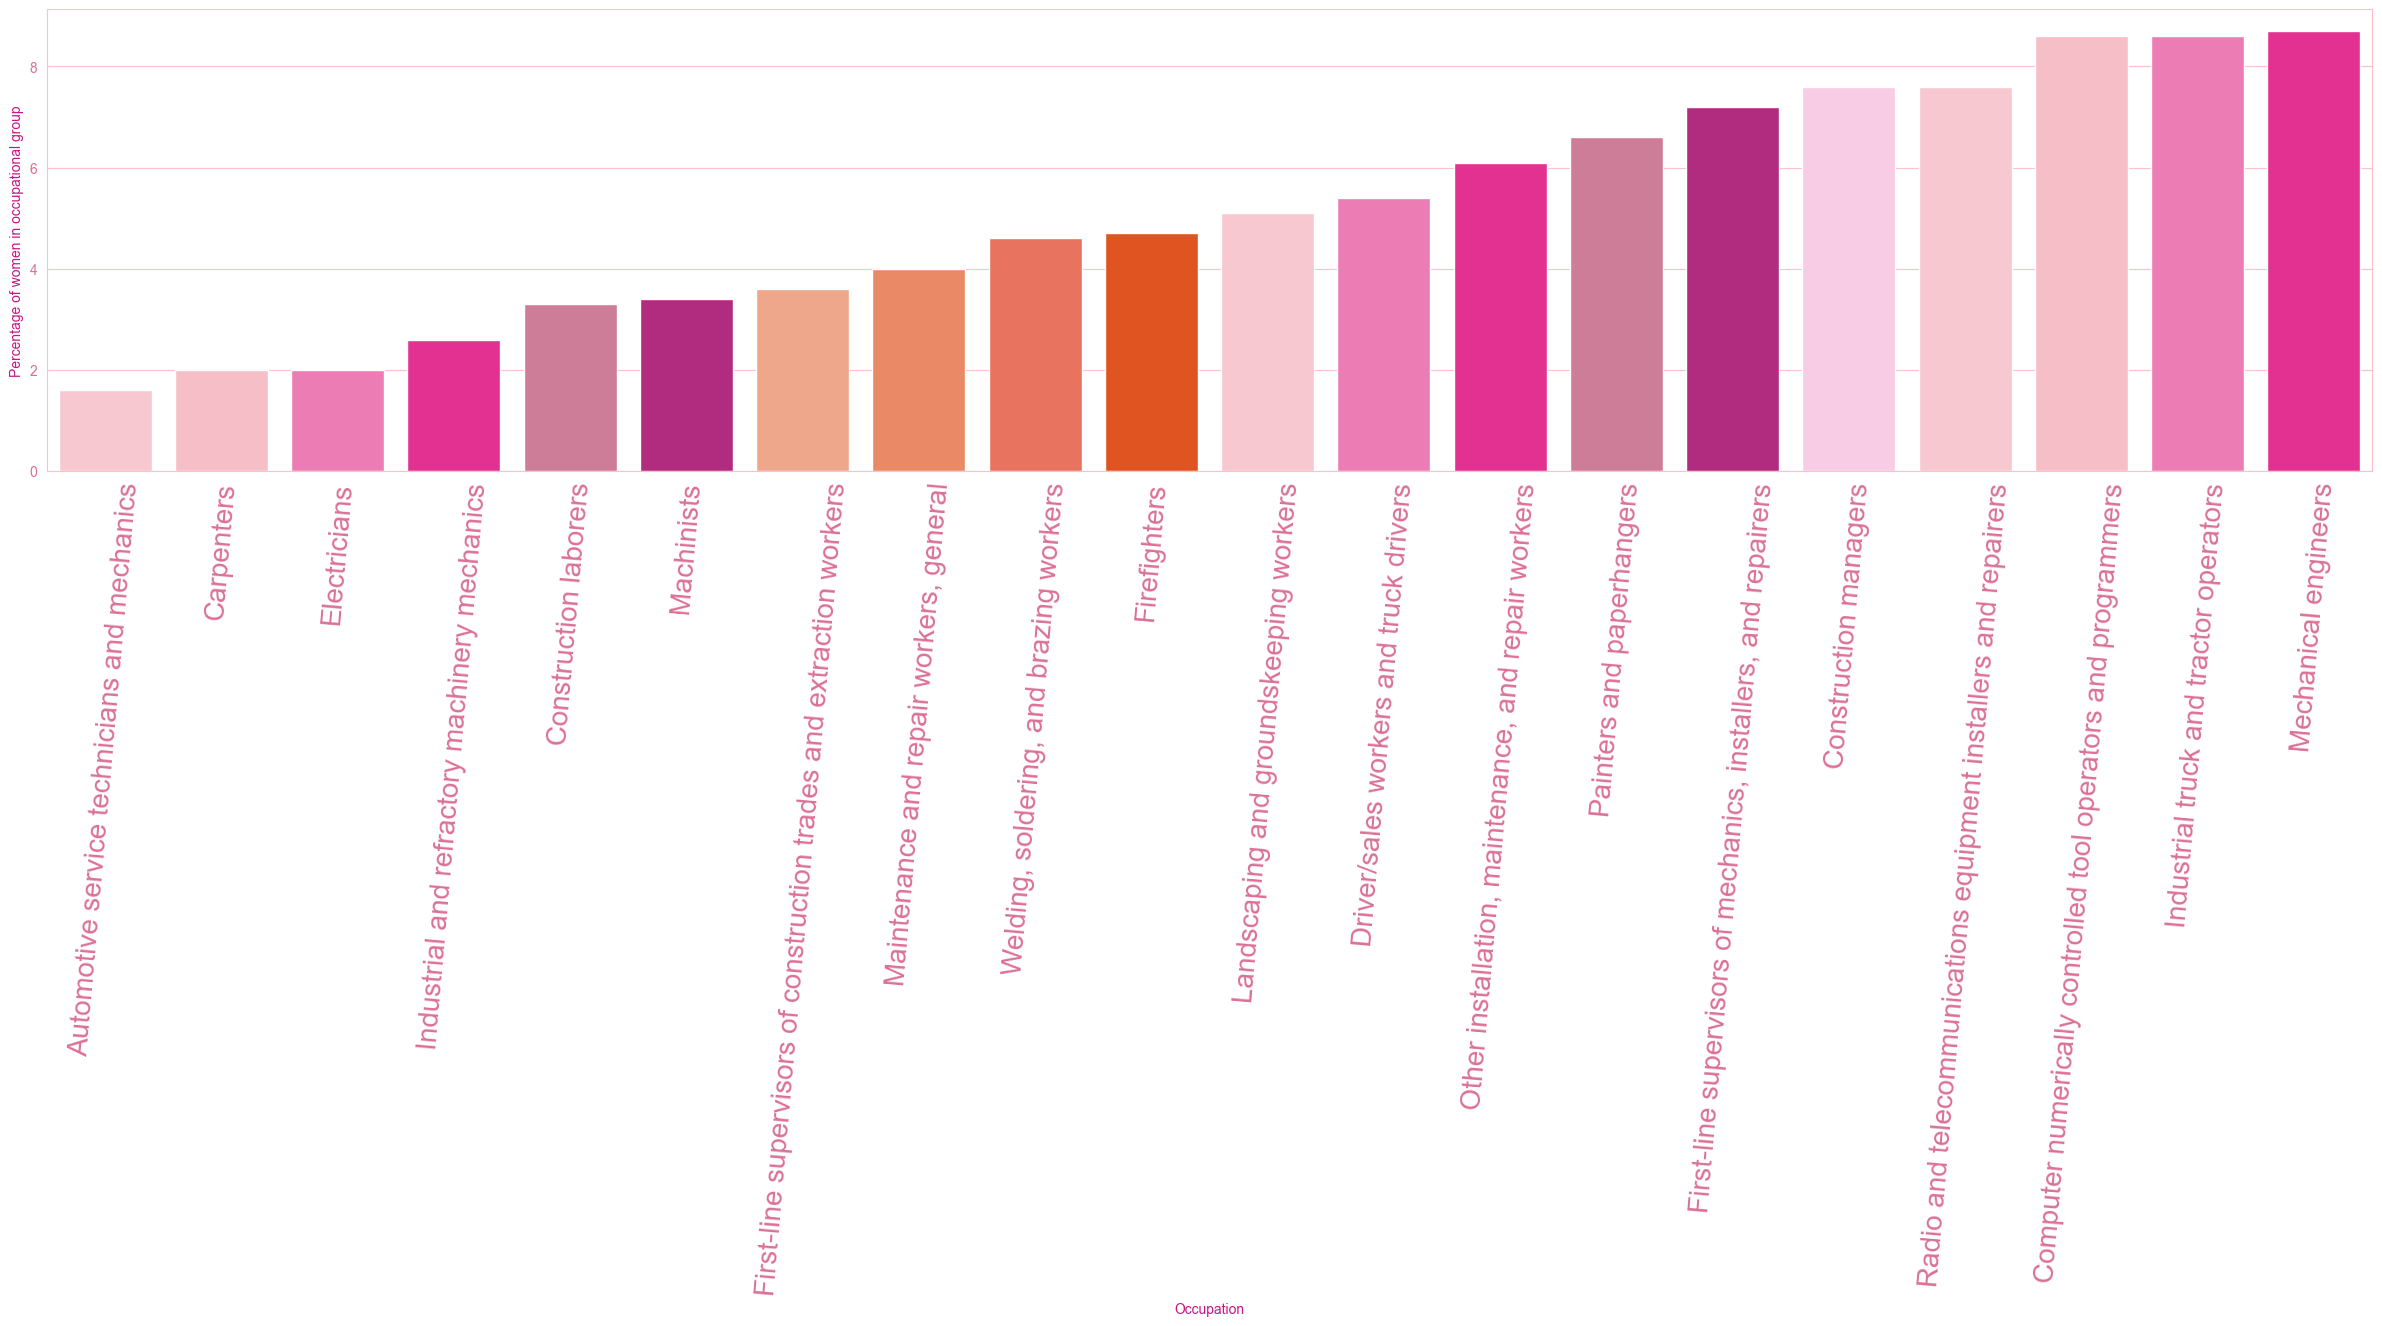

In [92]:
fig, ax = plt.subplots(figsize=(30, 6))
# Rotate the x-axis labels by 60 degrees
ax.tick_params(axis='x', rotation=85)

# Set a proper font size for the x-axis labels
ax.tick_params(axis='x', labelsize=20)

#plt.xticks(rotation=80)

sns.barplot(data = small_represent, x = 'Occupation', y = 'Percentage of women in occupational group',palette=custom_palette);

<span style="color: #E0218A; font-size: 30px;">Let's see women representation in stem both in Barbie World and Real Life.</span>

In [143]:
#scientists barbies
barbie_stem = jobs_barbie[jobs_barbie['Type'] == 'Science and engineering']

#now we need to find women scientist from real ocuupations dataset
#list of keywords related to sciences, technologies professions
tech_science = ['engineer','engineers','scientists', 'science', 'scientist','computer', 'architects', 'architect', 'technicians','programmers', 'technologists', 'web','geoscientists', 'software', 'statisticians', 'analysts']
#create a filter to collect required fields
tech_filter = jobs_real['Occupation'].apply(lambda x : any(substring.lower() in x.lower() for substring in tech_science))
#jobs_real

In [141]:
stem = jobs_real[tech_filter]

In [142]:
stem.reset_index(drop=True, inplace=True)
stem

,Occupation,Number of full-time workers,Number of men,Number of women,Percentage of women in occupational group,Median earnings,Median earnings men,Median earnings women,Women's earnings as a percentage of men's earnings
0,Aerospace engineers,"136,375","119,506","16,869",12.4,"112,150","115,374","100,540",87.1
1,Agricultural and food science technicians,"37,464","24,554","12,910",34.5,"50,519","55,521","42,201",76.0
2,Agricultural and food scientists,"27,595","19,376","8,219",29.8,"76,201","80,250","66,936",83.4
3,"Architects, except landscape and naval","182,912","132,865","50,047",27.4,"93,034","98,410","81,870",83.2
4,Architectural and civil drafters,"44,262","34,302","9,960",22.5,"58,834","59,487","56,078",94.3
5,Architectural and engineering managers,"205,299","180,544","24,755",12.1,"151,759","152,191","147,036",96.6
6,"Archivists, curators, and museum technicians","54,244","22,677","31,567",58.2,"61,540","64,666","59,986",92.8
7,Automotive service technicians and mechanics,"683,170","672,420","10,750",1.6,"44,015","44,353","34,981",78.9
8,Biological scientists,"80,729","41,771","38,958",48.3,"74,182","75,715","73,073",96.5
9,Biological technicians,"27,324","12,851","14,473",53.0,"54,096","52,756","55,486",105.2


In [144]:
barbie_stem

,ID,Type,Career,Year
58,59,Science and engineering,Architect,2011.0
59,60,Science and engineering,Astronaut,1965.0
60,61,Science and engineering,Astronaut,1986.0
61,62,Science and engineering,Astophysicist,2019.0
62,63,Science and engineering,Computer engineer,2010.0
63,64,Science and engineering,Geologist,NaN
64,65,Science and engineering,Game developer,2016.0
65,66,Science and engineering,Robotics engineer,2018.0
66,67,Science and engineering,Rocket engineer,2018.0
67,68,Science and engineering,Paleontologist,1997.0


In [145]:
stem_real = stem['Occupation'].count()
stem_barbie = barbie_stem['ID'].count()

In [147]:
stem_barbie

12

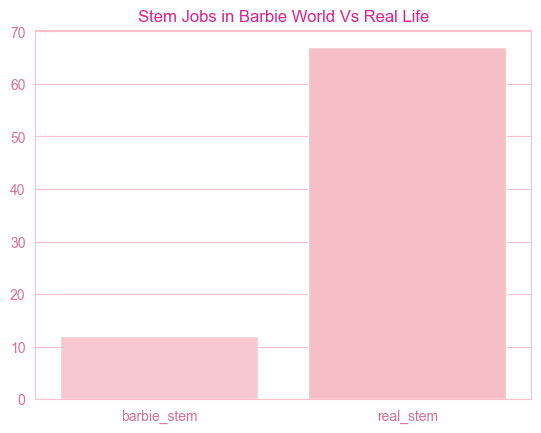

In [150]:
plt.title('Stem Jobs in Barbie World Vs Real Life', color = '#E0218A')
sns.barplot(x = ['barbie_stem', 'real_stem'], y = [stem_barbie, stem_real]);


<span style="color: #E0218A; font-size: 20px;">Now let's calculate average representation of women in the stem fields</span>

In [158]:
#as you see women represenation in stem field is less that 50%
average_representation = stem['Percentage of women in occupational group'].mean()
print("Average Representation of Women in STEM Careers:", average_representation)

Average Representation of Women in STEM Careers: 37.80298507462686


<span style="color: #E0218A; font-size: 20px;">Now let's calculate average women earnings as a percentage of men earnings</span>

In [161]:
percent_ofmen = stem["Women's earnings as a percentage of men's earnings"].mean()
print("Average Women Earnings as percetntage of menearnings:", percent_ofmen)

Average Women Earnings as percetntage of menearnings: 87.08059701492537


<span style="color: #E0218A; font-size: 20px;">In general, women make 87% of men's salaries in STEM fields</span>